# Analiza i przetwarzanie obrazów cyfrowych
[https://www.pawelrog.pl/aipoc](https://www.pawelrog.pl/aipoc)

## Zadanie 1 Manipulacja jasnością obrazu

Należy wczytać obraz z pliku i wygenerować na jego podstawie dwa obrazy: jeden o
zmniejszonej jasności, drugi - o zwiększonej jasności. W tym celu należy odpowiednio
zmodyfikować składową obrazu odpowiedzialną za luminancję. Wygenerowane obrazy wraz z
obrazem oryginalnym należy wyświetlić i zapisać do plików.

In [13]:
from skimage import exposure, img_as_ubyte
from skimage.io import imread, imsave

im = imread("002.jpg")
im1 = img_as_ubyte(im)

brighter = exposure.adjust_gamma(im1, 0.5)
darker = exposure.adjust_gamma(im1, 2)

imsave("002_brighter.jpg", brighter)
imsave("002_darker.jpg", darker)

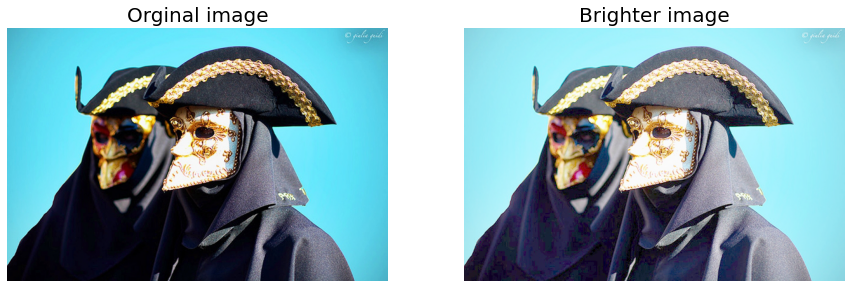

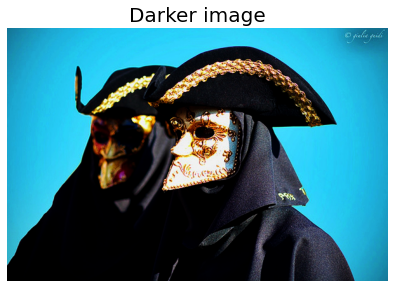

In [14]:
# display the picture in the notebook
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(im), plt.axis("off"), plt.title(
    "Orginal image", size=20
)
plt.subplot(122), plt.imshow(brighter), plt.axis("off"), plt.title(
    "Brighter image", size=20
)
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(122), plt.imshow(darker), plt.axis("off"), plt.title(
    "Darker image", size=20
)
plt.show()


## Zadanie 2
Transformacje afiniczne obrazu

Należy wczytać obraz z pliku i dokonać jego transformacji poprzez:
* odbicie względem obu osi;
* translację;
* skalowanie;
* rotację względem początku układu współrzędnych;
* ścięcie w obu kierunkach;
* złożenie wszystkich powyższych transformacji.

Wygenerowane obrazy wraz z obrazem oryginalnym należy wyświetlić i zapisać do plików.

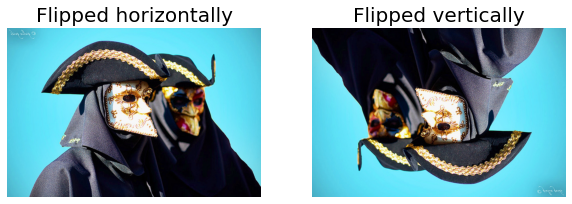

In [15]:
import numpy as np
from skimage import img_as_ubyte, transform
from skimage.io import imread, imsave

im = imread("002.jpg")
im1 = img_as_ubyte(im)

# vertical flip using slices (otherwise np.fliplr can be used)
vertical_flip = np.fliplr(im1)

# horizontal flip using numpy.fliplr
horizontal_flip = np.flipud(im1)

imsave("002_v_flip.jpg", vertical_flip)

imsave("002_h_flip.jpg", horizontal_flip)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(vertical_flip), plt.axis("off"), plt.title(
    "Flipped horizontally", size=20
)
plt.subplot(122), plt.imshow(horizontal_flip), plt.axis("off"), plt.title(
    "Flipped vertically", size=20
)
plt.show()

### Both flipped

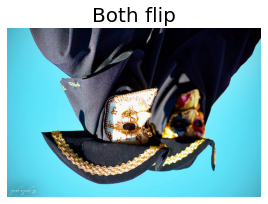

In [16]:
# both, using numpy
both_flip = np.flipud(np.fliplr(im1))
imsave("002_vh_flip.jpg", both_flip)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(both_flip), plt.axis("off"), plt.title(
    "Both flip", size=20
)
plt.show()

### Scaling

In [17]:
# scaling (in this example we divide by 2 height and width
h, w, _ = im1.shape
img_resized = transform.resize(im1, (int(h / 2), int(w / 2)))
imsave("002_resized.jpg", img_resized)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


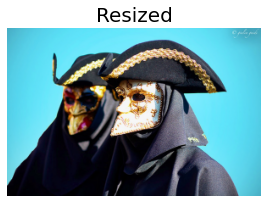

In [18]:

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_resized), plt.axis("off"), plt.title(
    "Resized", size=20
)
plt.show()

### Rotate

In [19]:
# rotate
img_rotated = transform.rotate(im1, angle=-45, resize=True)
imsave("002_rotated.jpg", img_rotated)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


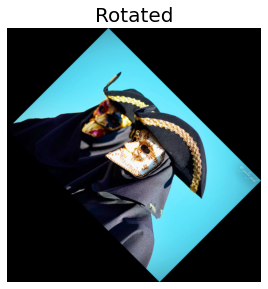

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_rotated), plt.axis("off"), plt.title(
    "Rotated", size=20
)
plt.show()

### Cropped

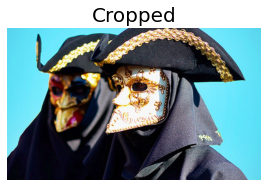

In [21]:
# crop
cropped = im1[50 : (im1.shape[0] - 50), 50 : (im1.shape[1] - 50)]
imsave("002_cropped.jpg", cropped)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(cropped), plt.axis("off"), plt.title(
    "Cropped", size=20
)
plt.show()

#### złożenie wszystkich powyższych transformacji.

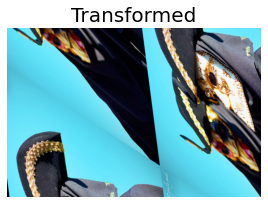

In [22]:
# using user-friendly AffineTransform instead of the cryptic affine_transform
tform = transform.AffineTransform(
    scale=(1.3, 1.1), rotation=1, shear=0.7, translation=(100, 50)
)
modified = transform.warp(im1, tform, mode="wrap", preserve_range=True)
imsave("002_mod2.jpg", modified.astype(im1.dtype))

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(modified.astype(im1.dtype)), plt.axis("off"), plt.title(
    "Transformed", size=20
)
plt.show()

## Zadanie 3 Usuwanie szumu za pomocą filtrów

Należy wczytać obraz z pliku. Jeśli jest to obraz kolorowy należy przekonwertować go do
skali szarości. 

Następnie należy wygenerować co najmniej trzy obrazy zawierające obraz
wejściowy wraz z dodanym szumem. Następnie należy odfiltrować szum z każdego z obrazów
na minimum dwa sposoby. Należy wyświetlić obraz oryginalny (w skali szarości) oraz dla
każdego z zaszumionych obrazów: obraz przed filtracją, obrazy po filtracji każdą z
metod, szum oraz histogram szumu. Dla każdego obrazu po filtracji należy policzyć i
wyświetlić szczytowy stosunek sygnału do szumu (PSNR).

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


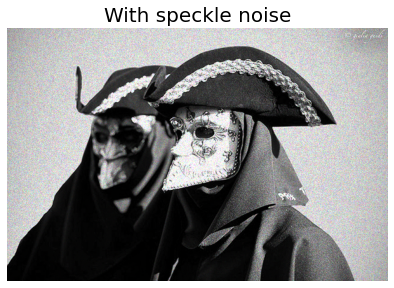

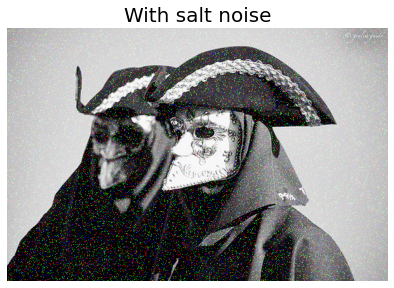

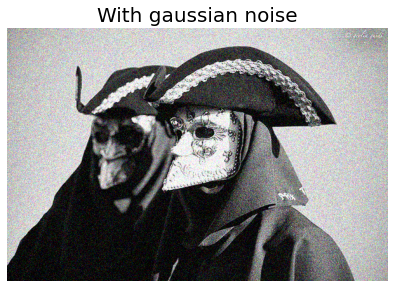

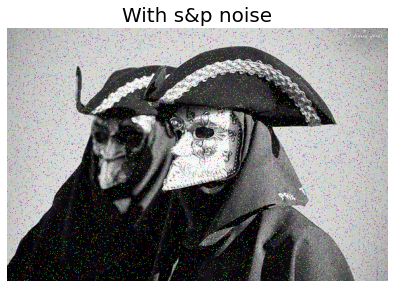

In [23]:
# add noise
from skimage.util import random_noise
from skimage.color import rgb2lab, lab2rgb
from PIL import Image

im = imread("002.jpg")

# convert to gray scale
im1 = rgb2lab(im)
im1 [..., 1] = im1 [..., 2] = 0
im1 = lab2rgb(im1)

imsave("002_gray.jpg", im1)
im_arr = np.asarray(im1)
noisy_images = {}

for mode_name in ["speckle", "salt", "gaussian", "s&p"]:
    noise_img = random_noise(im_arr, mode=mode_name)
    noise_img = (255*noise_img).astype(np.uint8)
    
    noisy_images[mode_name] = noise_img
    imsave(f"002_with_{mode_name}_noise.jpg", noise_img)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(noise_img), plt.axis("off"), plt.title(
        f"With {mode_name} noise", size=20
    )
    plt.show()

### Reducing noise

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Estimated Gaussian noise standard deviation = 10.153052592641048


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


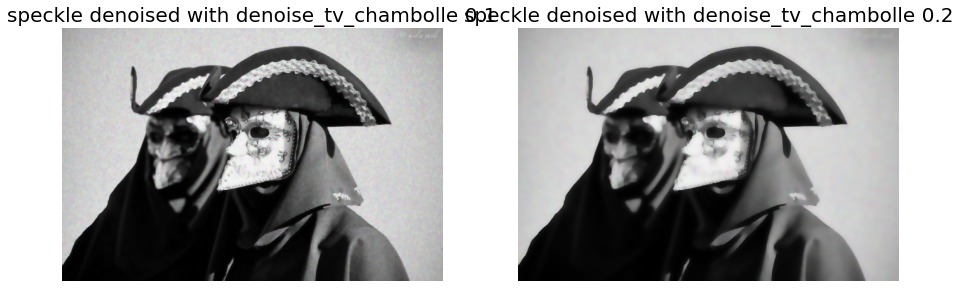

Estimated Gaussian noise standard deviation = 7.219764905677148


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


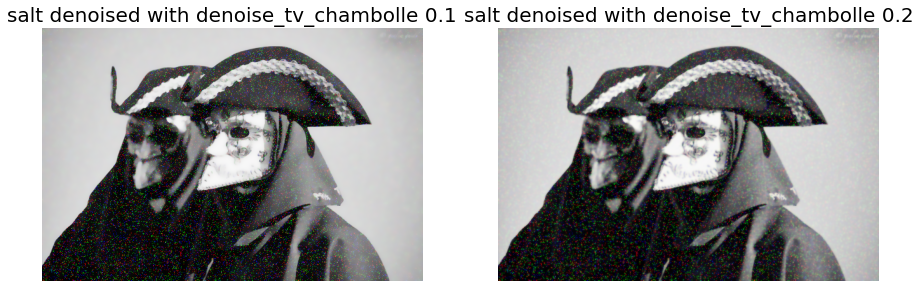

Estimated Gaussian noise standard deviation = 22.455797649785442


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


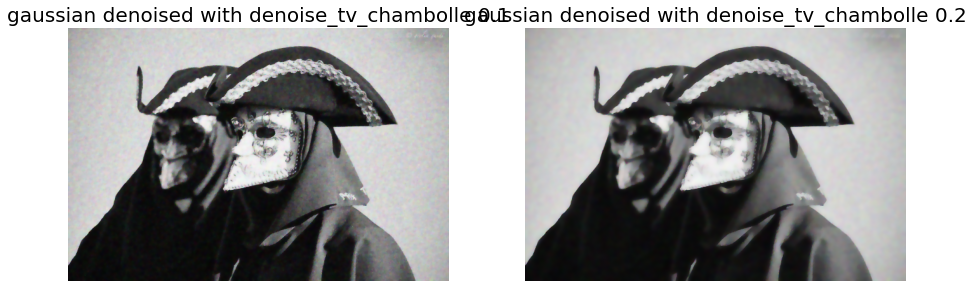

Estimated Gaussian noise standard deviation = 6.666680520081343


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


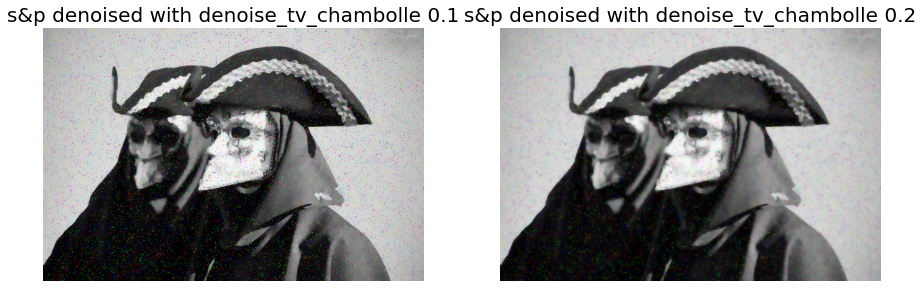

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


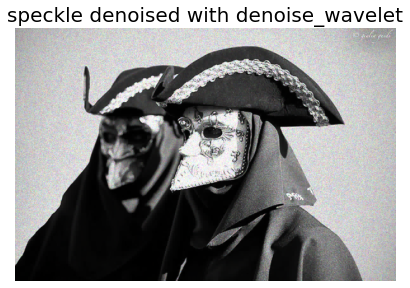

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


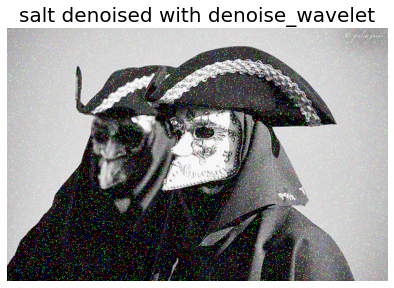

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


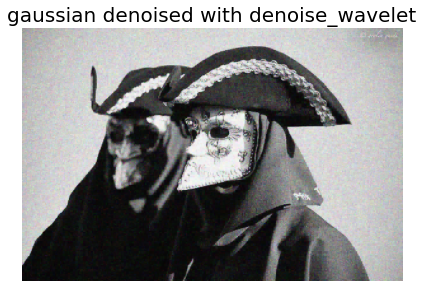

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


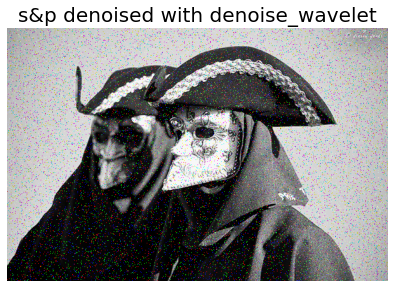

In [30]:
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_wavelet,
    estimate_sigma
)

for mode_name, image in noisy_images.items():
    # Estimate the average noise standard deviation across color channels.
    sigma_est = estimate_sigma(image, multichannel=True, average_sigmas=True)
    
    # Due to clipping in random_noise, the estimate will be a bit smaller than the
    # specified sigma.
    print(f"Estimated Gaussian noise standard deviation = {sigma_est}")
    
    denoised = denoise_tv_chambolle(image, weight=0.1, multichannel=True)
    imsave(f"002_with_{mode_name}_denoised_chambolle_1.jpg", denoised)
    
    denoised2 = denoise_tv_chambolle(image, weight=0.2, multichannel=True)
    imsave(f"002_with_{mode_name}_denoised_chambolle_2.jpg", denoised2)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(denoised), plt.axis("off"), plt.title(
        f"{mode_name} denoised with denoise_tv_chambolle 0.1", size=20
    )
    plt.subplot(122), plt.imshow(denoised2), plt.axis("off"), plt.title(
        f"{mode_name} denoised with denoise_tv_chambolle 0.2", size=20
    )
    plt.show()
    
for mode_name, image in noisy_images.items():
    
    denoised = denoise_wavelet(image, multichannel=True, rescale_sigma=True)
    imsave(f"002_with_{mode_name}_denoised_2.jpg", denoised)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121), plt.imshow(denoised), plt.axis("off"), plt.title(
        f"{mode_name} denoised with denoise_wavelet", size=20
    )
    plt.show()

In [ ]:
# denoise_bilateral is outrageously slow on my pc, so it's omitted here...

## Zadanie 7 - ocena dobra

Segmentacja obrazu

Należy wczytać obraz. Następnie należy dokonać jego segmentacji dowolną metodą. Proszę wyświetlić obraz źródłowy oraz po segmentacji.

(-0.5, 1199.5, 798.5, -0.5)

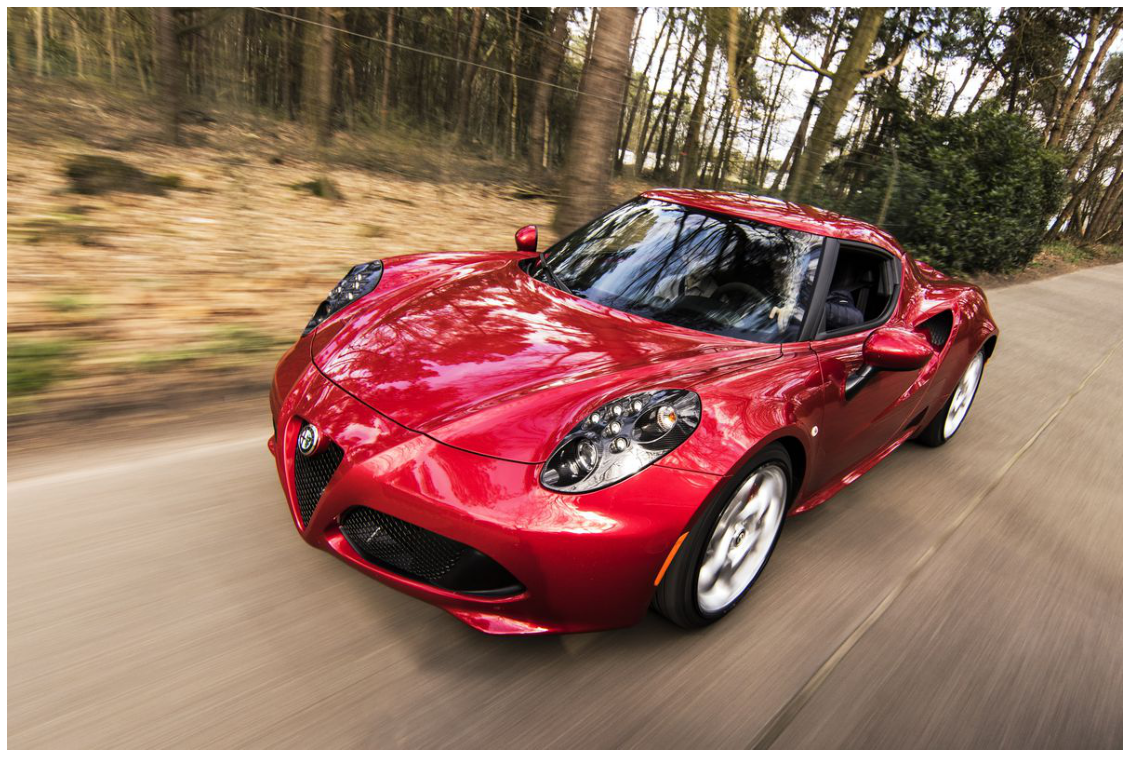

In [2]:
# note: car picture from pexels.com:
# https://www.pexels.com/photo/red-alfa-romeo-c4-on-road-near-trees-210019/
# pexels-pixabay-210019.jpg

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import color
import numpy as np

cimage = imread("car-medium-size.jpg")
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(cimage)
ax.axis('off')

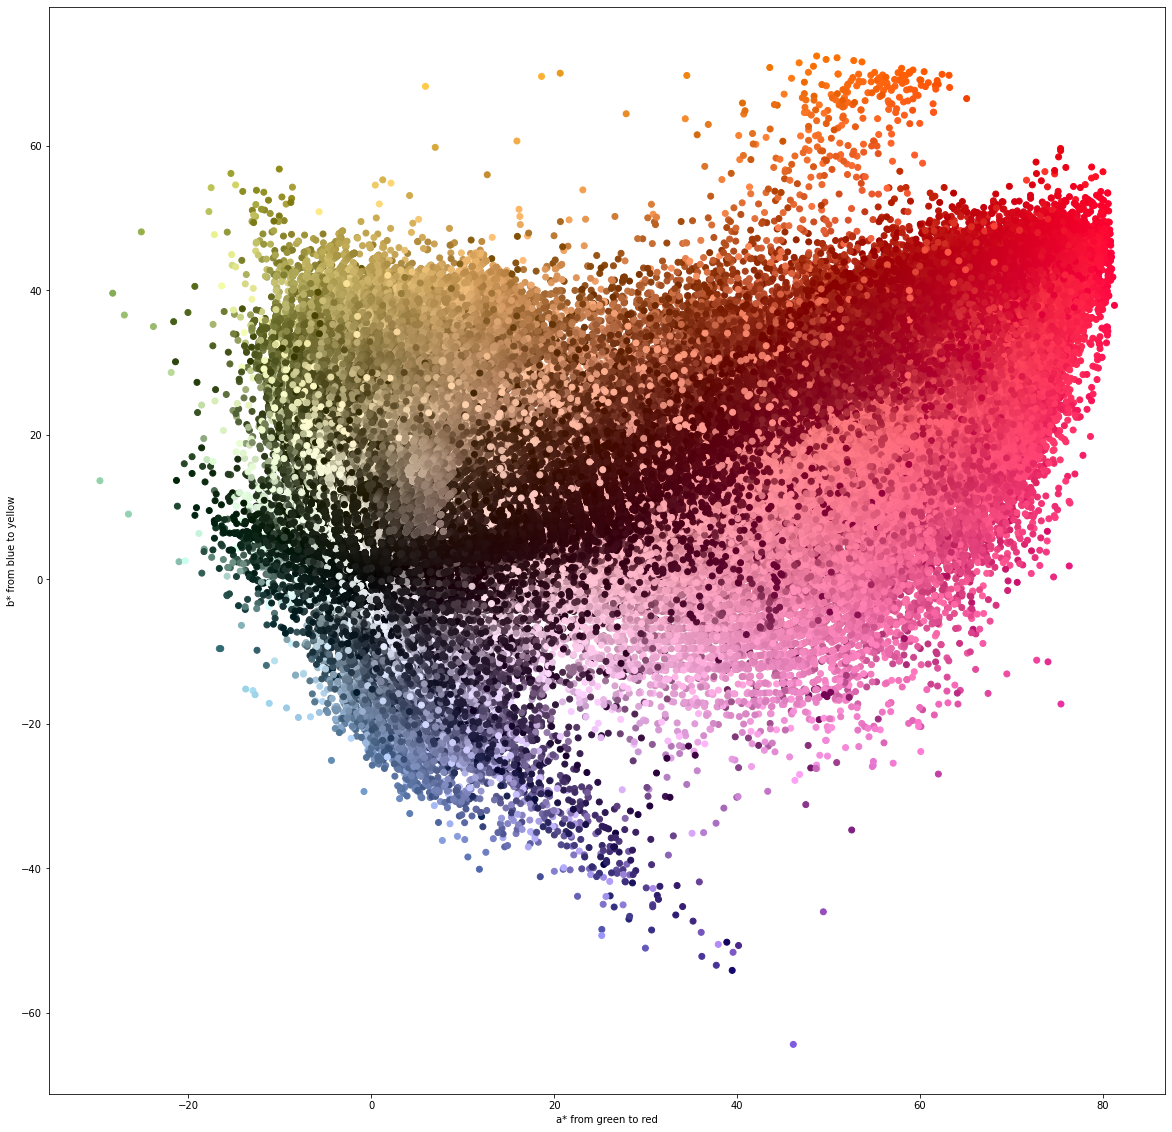

In [4]:
# convert the image from RGB to LAB
lab_img = color.rgb2lab(cimage)
x,y,z = lab_img.shape

# to plot the colors we will use the RGB values from the
# image directly for colors. 
to_plot = cimage.reshape(x * y, 3)
colors_map = to_plot.astype(float) / 256

# create dataset for scatter plot
scatter_x = []
scatter_y = []
for xi in range(x):
    for yi in range(y):
        L_val = lab_img[xi,yi][0] 
        A_val = lab_img[xi,yi][1] 
        B_val = lab_img[xi,yi][2]
        scatter_x.append(A_val)
        scatter_y.append(B_val)
        
plt.figure(figsize=(20,20))
plt.xlabel("a* from green to red")
plt.ylabel("b* from blue to yellow")
plt.scatter(scatter_x,scatter_y, c=colors_map)

In [ ]:
def filter_color(L_val_min, A_val_min, A_val_max, B_val_min, B_val_max):
    filtered_image = np.copy(cimage)
    for xi in range(x):
        for yi in range(y):
            L_val = lab_img[xi,yi][0] 
            A_val = lab_img[xi,yi][1] 
            B_val = lab_img[xi,yi][2]
            if L_val > L_val_min and A_val > A_val_min and A_val < A_val_max and B_val > B_val_min and B_val < B_val_max:
                pass
            else:
                filtered_image[xi, yi] = [255,255,255]   
    return filtered_image

lab_img = color.rgb2lab(cimage)
car_body_colors = filter_color(0, A_val_min=20, A_val_max=100, B_val_min=-10, B_val_max=150)
grays = filter_color(-255, A_val_min=-60, A_val_max=60, B_val_min=-80, B_val_max=0)
background = filter_color(-255, A_val_min=-40, A_val_max=25, B_val_min=0, B_val_max=80)
background2 = filter_color(-120, A_val_min=-40, A_val_max=15, B_val_min=0, B_val_max=20)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax[0][0].imshow(car_body_colors)
ax[0][0].set_title("car body")
ax[0][0].axis('off')

ax[0][1].imshow(grays)
ax[0][1].set_title("gray-blue")
ax[0][1].axis('off')

ax[1][0].imshow(background)
ax[1][0].set_title("background")
ax[1][0].axis('off')

ax[1][1].imshow(grays_2)
ax[1][1].set_title("background2")
ax[1][1].axis('off')